In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df_train = pd.read_csv('train.csv')
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
df = pd.read_csv('hour.csv')
df.shape
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
df.drop(columns = ['instant', 'casual', 'registered'], inplace = True)
df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [5]:
h = pd.get_dummies(df['hr'], prefix = "hour")
df = pd.concat([df, h], axis = 1)
w = pd.get_dummies(df['weathersit'], prefix = "weather")
df = pd.concat([df, w], axis = 1)
m = pd.get_dummies(df['mnth'], prefix = "month")
df = pd.concat([df, m], axis = 1)
s = pd.get_dummies(df['season'], prefix = "season")
df = pd.concat([df, s], axis = 1)
wd = pd.get_dummies(df['weekday'], prefix = "weekday")
df = pd.concat([df, wd], axis = 1)

df.drop(columns = ['hr', 'weathersit', 'mnth', 'season', 'weekday'], inplace = True)

df.head()

,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,hour_0,...,season_2,season_3,season_4,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,2011-01-01,0,0,0,0.24,0.2879,0.81,0.0,16,1,...,0,0,0,0,0,0,0,0,0,1
1,2011-01-01,0,0,0,0.22,0.2727,0.80,0.0,40,0,...,0,0,0,0,0,0,0,0,0,1
2,2011-01-01,0,0,0,0.22,0.2727,0.80,0.0,32,0,...,0,0,0,0,0,0,0,0,0,1
3,2011-01-01,0,0,0,0.24,0.2879,0.75,0.0,13,0,...,0,0,0,0,0,0,0,0,0,1
4,2011-01-01,0,0,0,0.24,0.2879,0.75,0.0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [6]:
cnt = df['cnt']
df.drop(columns = ['cnt'], inplace = True)
df = pd.concat([df, cnt], axis = 1)

df.head()

,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,hour_0,hour_1,...,season_3,season_4,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,cnt
0,2011-01-01,0,0,0,0.24,0.2879,0.81,0.0,1,0,...,0,0,0,0,0,0,0,0,1,16
1,2011-01-01,0,0,0,0.22,0.2727,0.80,0.0,0,1,...,0,0,0,0,0,0,0,0,1,40
2,2011-01-01,0,0,0,0.22,0.2727,0.80,0.0,0,0,...,0,0,0,0,0,0,0,0,1,32
3,2011-01-01,0,0,0,0.24,0.2879,0.75,0.0,0,0,...,0,0,0,0,0,0,0,0,1,13
4,2011-01-01,0,0,0,0.24,0.2879,0.75,0.0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [7]:
df['dteday'] = df['dteday'].map( lambda d: (d[8:]))
df['dteday'] = df['dteday'].astype('int')

df_train = df[(df['dteday'] < 20)]
df_test = df[(df['dteday'] >= 20)]

print(df.shape)
print(df_train.shape)
print(df_test.shape)

(17379, 60)
(10886, 60)
(6493, 60)


In [8]:
df.corr()

,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,hour_0,hour_1,...,season_3,season_4,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,cnt
dteday,1.000000,0.002057,-0.010132,0.008627,0.027180,0.021269,0.025663,0.010505,-0.000201,-0.000321,...,0.016495,-0.017224,-0.007327,0.008664,-0.003806,0.003476,-0.005056,0.003334,0.000713,-0.004312
yr,0.002057,1.000000,0.006692,-0.002196,0.040913,0.039222,-0.083546,-0.008740,0.000081,0.000084,...,-0.000923,-0.007732,0.004456,-0.000608,-0.000589,0.000712,0.001375,-0.000614,-0.004723,0.250495
holiday,-0.010132,0.006692,1.000000,-0.252471,-0.027340,-0.030973,-0.010588,0.003988,0.000194,0.000293,...,-0.026216,0.017840,-0.070583,0.281198,-0.047034,-0.046498,-0.022760,-0.023151,-0.070747,-0.030927
workingday,0.008627,-0.002196,-0.252471,1.000000,0.055390,0.054667,0.015688,-0.011830,0.000213,-0.000179,...,0.020182,-0.007280,-0.601570,0.151854,0.268194,0.269312,0.260548,0.261640,-0.602974,0.030284
temp,0.027180,0.040913,-0.027340,0.055390,1.000000,0.987672,-0.069881,-0.023125,-0.032072,-0.040738,...,0.642516,-0.217601,-0.028042,-0.004111,0.024384,0.020502,0.021208,-0.001184,-0.032321,0.404772
atemp,0.021269,0.039222,-0.030973,0.054667,0.987672,1.000000,-0.051918,-0.062336,-0.029975,-0.039414,...,0.619570,-0.198218,-0.024505,0.000315,0.026904,0.018385,0.021906,-0.009386,-0.033168,0.400929
hum,0.025663,-0.083546,-0.010588,0.015688,-0.069881,-0.051918,1.000000,-0.290105,0.069038,0.083197,...,0.018184,0.117326,0.001626,0.017808,0.026485,0.037158,-0.037143,-0.028361,-0.017353,-0.322911
windspeed,0.010505,-0.008740,0.003988,-0.011830,-0.023125,-0.062336,-0.290105,1.000000,-0.048367,-0.053580,...,-0.089358,-0.089410,-0.006720,-0.004116,0.006030,-0.009745,0.006288,-0.012250,0.020471,0.093234
hour_0,-0.000201,0.000081,0.000194,0.000213,-0.032072,-0.029975,0.069038,-0.048367,1.000000,-0.043533,...,-0.000537,0.000141,-0.000426,0.001185,-0.001217,0.000500,-0.000185,0.000088,0.000051,-0.156054
hour_1,-0.000321,0.000084,0.000293,-0.000179,-0.040738,-0.039414,0.083197,-0.053580,-0.043533,1.000000,...,-0.000856,-0.000203,-0.000190,0.000598,-0.001812,0.000736,0.000049,0.000323,0.000288,-0.179420


In [11]:
df_train.head()

,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,hour_0,hour_1,...,season_3,season_4,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,cnt
0,1,0,0,0,0.24,0.2879,0.81,0.0,1,0,...,0,0,0,0,0,0,0,0,1,16
1,1,0,0,0,0.22,0.2727,0.80,0.0,0,1,...,0,0,0,0,0,0,0,0,1,40
2,1,0,0,0,0.22,0.2727,0.80,0.0,0,0,...,0,0,0,0,0,0,0,0,1,32
3,1,0,0,0,0.24,0.2879,0.75,0.0,0,0,...,0,0,0,0,0,0,0,0,1,13
4,1,0,0,0,0.24,0.2879,0.75,0.0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [8]:
train_set = df_train.values
test_set = df_test.values

y = train_set[:,-1]
y.shape = (train_set.shape[0],1)
x = train_set[:, 1:-1]
one = np.ones((x.shape[0], 1))
x = np.append(one, x, axis = 1)

y_test = test_set[:,-1]
y_test.shape = (test_set.shape[0],1)
x_test = test_set[:,1:-1]
one = np.ones((x_test.shape[0], 1))
x_test = np.append(one, x_test, axis = 1)

print(x.shape)
print(y.shape)

print(x_test.shape)
print(y_test.shape)

(10886, 59)
(10886, 1)
(6493, 59)
(6493, 1)


In [9]:
def prediction(X, beta):
    lamda = np.exp(np.matmul(X, beta))
    
    return lamda

def rmse(y, y_cap):
    err = np.sqrt(np.sum((y_cap-y)**2)/float(y.shape[0]))
    
    return err

In [41]:
def gradient(x, y, beta):
    g = (np.exp(np.matmul(x, beta)) - y)*x
    res = np.sum(g, axis = 0)
    
    return res


def sgd(x, y, alpha, iterations):
    #print("Shape x ", x.shape)
    #gradient descent method 
    beta = np.random.normal(scale = 1.0/x.shape[1], size = (x.shape[1], 1))  #initialize
    #print("Initial beta", beta)
    
    m = np.matmul(x, beta)
    loss = np.sum((np.exp(m) - y*m))
    
    
    error = rmse(y, prediction(x, beta))
    
    itr = 0
    
    training_process = []
    while(itr < iterations):
        beta = beta - alpha*gradient(x, y, beta).reshape(beta.shape)
        
        #m = np.matmul(x, beta)
        #loss = np.sum((np.exp(m) - y*m))
        error = rmse(y, prediction(x, beta))
        training_process.append((itr, error))
        
        #if(itr == 0 or itr%1000 == 0):
            #print("Iteration : %d  Error = %f" %(itr, error))
        itr = itr+1
    
    error = rmse(y, prediction(x, beta))
    #print("Iterations completed. Error = %f" %(error))
    
    return beta, training_process

Iteration : 0  Error = 262.035691
Iteration : 1000  Error = 89.409506
Iteration : 2000  Error = 88.618160
Iteration : 3000  Error = 88.496206
Iteration : 4000  Error = 88.465788


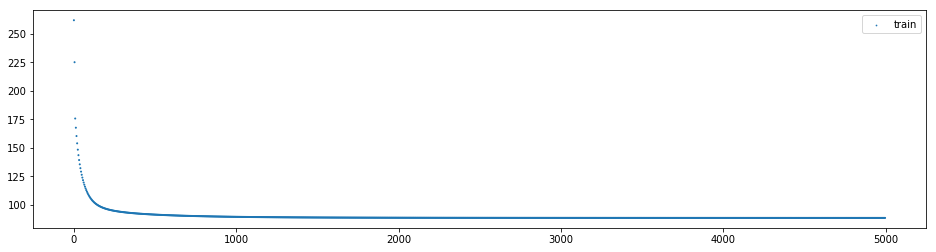

In [12]:
#Incresed features
beta, tr_set = sgd(x, y, 1e-7, 5000)


x1 = [i for i, j in tr_set]
y1 = [j for i, j in tr_set]
plt.figure(figsize=((16,4)))
plt.scatter(x1, y1, s=s, label = 'train')

plt.legend()
plt.show()

#print(y)
#print(beta)

(10886, 1)
(10886, 1)
262.9042879353587
262.9042879353587
Iteration : 0  Error = 262.840752
Iteration : 1000  Error = 106.698237
Iteration : 2000  Error = 96.464922
Iteration : 3000  Error = 93.660051
Iteration : 4000  Error = 92.281786
Iteration : 5000  Error = 91.401675
Iteration : 6000  Error = 90.772330
Iteration : 7000  Error = 90.298972
Iteration : 8000  Error = 89.934280
Iteration : 9000  Error = 89.649643
Iterations completed. Error = 89.425815


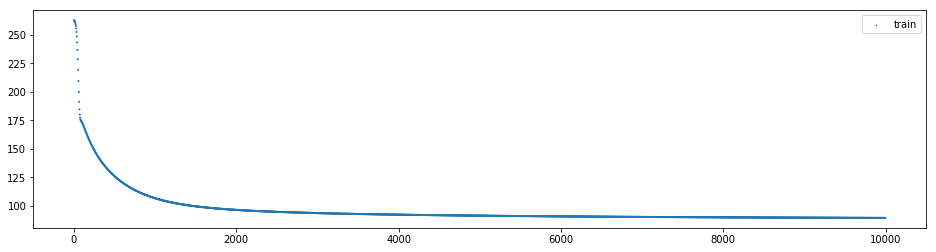

In [13]:
#Incresed features
beta, tr_set = sgd(x, y, 1e-8, 10000)


x1 = [i for i, j in tr_set]
y1 = [j for i, j in tr_set]
plt.figure(figsize=((16,4)))
plt.scatter(x1, y1, s=s, label = 'train')

plt.legend()
plt.show()

#print(y)
#print(beta)

(10886, 1)
(10886, 1)
262.9583542423925
262.9583542423925
Iteration : 0  Error = 262.607621
Iteration : 1000  Error = 91.288157
Iteration : 2000  Error = 89.391534
Iteration : 3000  Error = 88.817241
Iteration : 4000  Error = 88.613175
Iterations completed. Error = 88.530735


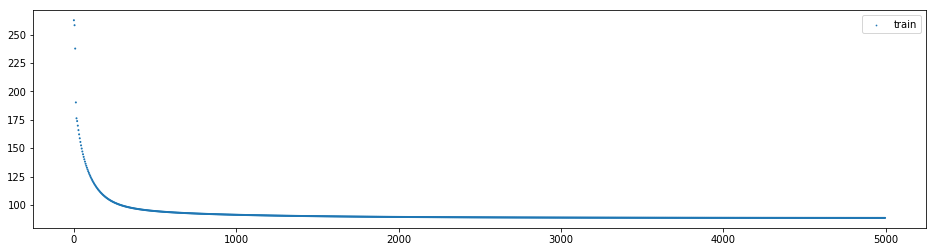

In [14]:
#Incresed features
beta, tr_set = sgd(x, y, 5*1e-8, 5000)


x1 = [i for i, j in tr_set]
y1 = [j for i, j in tr_set]
plt.figure(figsize=((16,4)))
plt.scatter(x1, y1, s=s, label = 'train')

plt.legend()
plt.show()

#print(y)
#print(beta)

(10886, 1)
(10886, 1)
262.91757765162214
262.91757765162214
Iteration : 0  Error = 261.982816
Iteration : 1000  Error = 89.397894
Iteration : 2000  Error = 88.616616
Iteration : 3000  Error = 88.495849
Iteration : 4000  Error = 88.465626
Iterations completed. Error = 88.454464


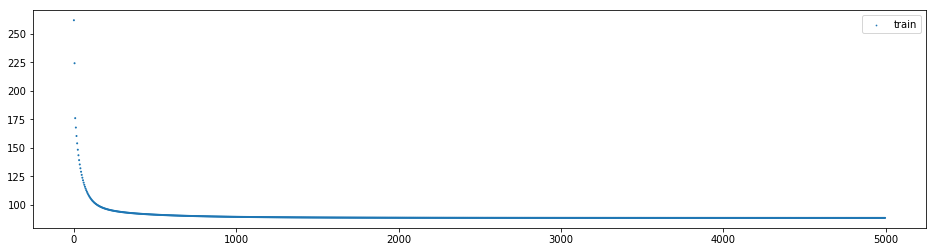

In [15]:
#Incresed features
beta, tr_set = sgd(x, y, 1e-7, 5000)


x1 = [i for i, j in tr_set]
y1 = [j for i, j in tr_set]
plt.figure(figsize=((16,4)))
plt.scatter(x1, y1, s=s, label = 'train')

plt.legend()
plt.show()

#print(y)
#print(beta)

(10886, 1)
(10886, 1)
262.9504878285453
262.9504878285453
Iteration : 0  Error = 1147250701599198543872.000000
Iteration : 1000  Error = 263.649288
Iteration : 2000  Error = 263.649288
Iteration : 3000  Error = 263.649288
Iteration : 4000  Error = 263.649288
Iteration : 5000  Error = 263.649288
Iteration : 6000  Error = 263.649288
Iteration : 7000  Error = 263.649288
Iteration : 8000  Error = 263.649288
Iteration : 9000  Error = 263.649288
Iterations completed. Error = 263.649288


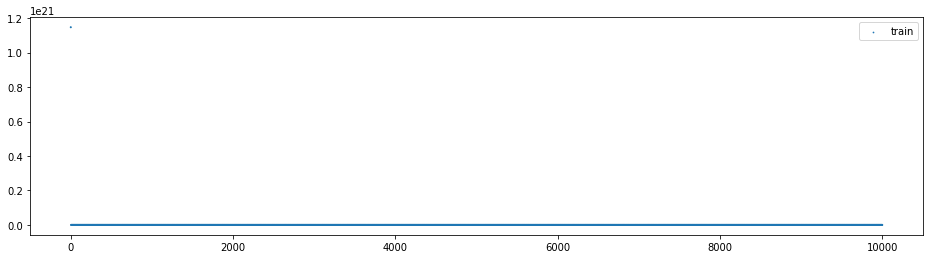

In [16]:
#Incresed features
beta, tr_set = sgd(x, y, 5*1e-6, 10000)


x1 = [i for i, j in tr_set]
y1 = [j for i, j in tr_set]
plt.figure(figsize=((16,4)))
plt.scatter(x1, y1, s=s, label = 'train')

plt.legend()
plt.show()

#print(y)
#print(beta)

(10886, 1)
(10886, 1)
262.9325389256282
262.9325389256282
Iteration : 0  Error = 262.018716
Iteration : 1000  Error = 89.417681
Iteration : 2000  Error = 88.615847
Iteration : 3000  Error = 88.493414
Iteration : 4000  Error = 88.463400
Iterations completed. Error = 88.452615


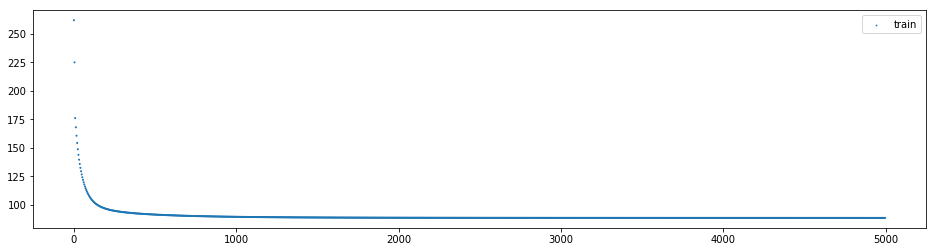

In [17]:
#Incresed features
beta, tr_set = sgd(x, y, 1e-7, 5000)


x1 = [i for i, j in tr_set]
y1 = [j for i, j in tr_set]
plt.figure(figsize=((16,4)))
plt.scatter(x1, y1, s=s, label = 'train')

plt.legend()
plt.show()

#print(y)
#print(beta)

In [21]:
y_pred = prediction(x_test, beta)

test_error = rmse(y_pred, y_test)
print(test_error)

94.14746183261832


In [44]:
def L2_gradient(x, y, gamma, beta):
    g = (np.exp(np.matmul(x, beta)) - y)*x
    res = np.sum(g, axis = 0)
    res = res + gamma*beta.T
    
    return res


def L2_training(x, y, alpha, gamma, iterations):
    #gradient descent method 
    beta = np.random.normal(scale = 1.0/x.shape[1], size = (x.shape[1], 1))  #initialize
    
    m = np.matmul(x, beta)
    loss = np.sum(np.exp(m) - y*m) + 0.5*gamma*np.matmul(beta.T, beta)

    error = rmse(y, prediction(x, beta))
    
    itr = 0
    #print(error)
    
    training_process = []
    while(itr < iterations):
        beta = beta - alpha*L2_gradient(x, y, gamma, beta).reshape(beta.shape)
        
        #m = np.matmul(x, beta)
        #loss = np.sum((np.exp(m) - y*m))
        error = rmse(y, prediction(x, beta))
        training_process.append((itr, error))
        
        #if(itr == 0 or itr%1000 == 0):
           # print("Iteration : %d  Error = %f" %(itr, error))
        itr = itr+1
    
    error = rmse(y, prediction(x, beta))
    #print("Iterations completed. Error = %f" %(error))
    
    return beta, training_process

262.8886711112983
262.8886711112983
Iteration : 0  Error = 261.913659
Iteration : 1000  Error = 89.396574
Iteration : 2000  Error = 88.616044
Iteration : 3000  Error = 88.495450
Iteration : 4000  Error = 88.465351
Iterations completed. Error = 88.454287


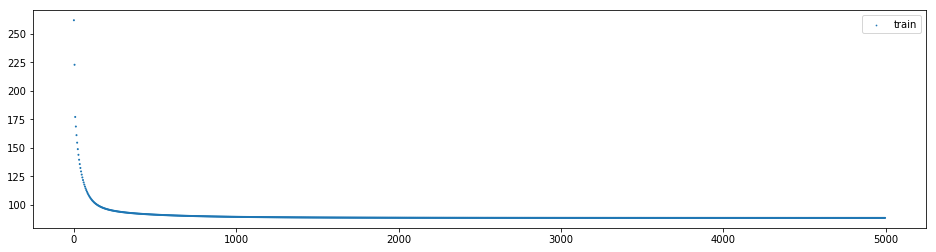

94.3492220470793


In [37]:
#Incresed features
beta, tr_set = L2_training(x, y, 1e-7, 1e-6, 5000)


x1 = [i for i, j in tr_set]
y1 = [j for i, j in tr_set]
plt.figure(figsize=((16,4)))
plt.scatter(x1, y1, s=s, label = 'train')

plt.legend()
plt.show()

#print(y)
#print(beta)

y_pred = prediction(x_test, beta)

test_error = rmse(y_pred, y_test)
print(test_error)

262.93200754537474
262.93200754537474
Iteration : 0  Error = 262.015822
Iteration : 1000  Error = 89.414401
Iteration : 2000  Error = 88.615134
Iteration : 3000  Error = 88.493149
Iteration : 4000  Error = 88.463225
Iterations completed. Error = 88.452485


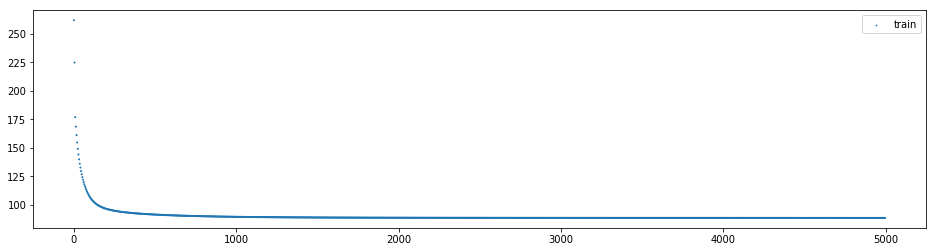

94.35578188824633


In [38]:
#Incresed features
beta, tr_set = L2_training(x, y, 1e-7, 1e-5, 5000)


x1 = [i for i, j in tr_set]
y1 = [j for i, j in tr_set]
plt.figure(figsize=((16,4)))
plt.scatter(x1, y1, s=s, label = 'train')

plt.legend()
plt.show()

#print(y)
#print(beta)

y_pred = prediction(x_test, beta)

test_error = rmse(y_pred, y_test)
print(test_error)

262.96994433514163
262.96994433514163
Iteration : 0  Error = 262.103998
Iteration : 1000  Error = 89.400708
Iteration : 2000  Error = 88.615458
Iteration : 3000  Error = 88.494526
Iteration : 4000  Error = 88.464512
Iterations completed. Error = 88.453560


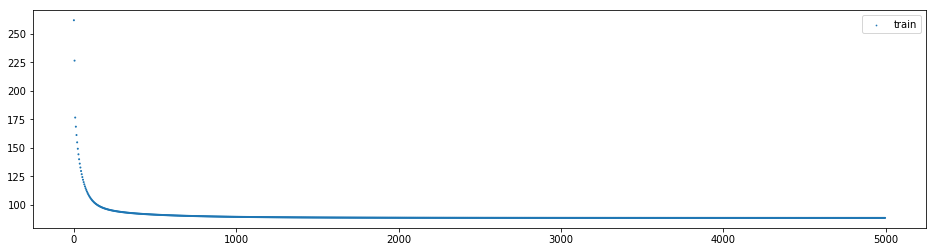

94.1506652861551


In [39]:
#Incresed features
beta, tr_set = L2_training(x, y, 1e-7, 1e-4, 5000)


x1 = [i for i, j in tr_set]
y1 = [j for i, j in tr_set]
plt.figure(figsize=((16,4)))
plt.scatter(x1, y1, s=s, label = 'train')

plt.legend()
plt.show()

#print(y)
#print(beta)

y_pred = prediction(x_test, beta)

test_error = rmse(y_pred, y_test)
print(test_error)

262.92909645889637
262.92909645889637
Iteration : 0  Error = 262.010479
Iteration : 1000  Error = 89.409201
Iteration : 2000  Error = 88.615796
Iteration : 3000  Error = 88.494077
Iteration : 4000  Error = 88.464056
Iterations completed. Error = 88.453189


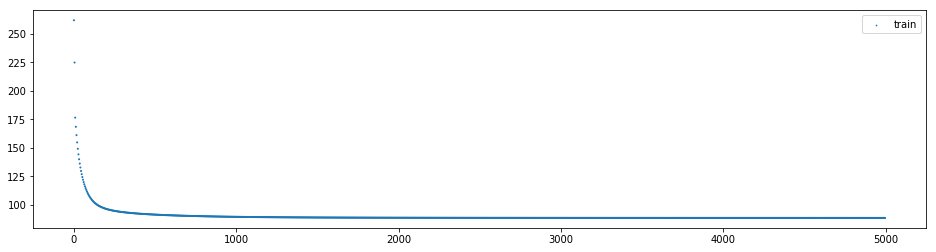

93.96127084128125


In [40]:
#Incresed features
beta, tr_set = L2_training(x, y, 1e-7, 1e-3, 5000)


x1 = [i for i, j in tr_set]
y1 = [j for i, j in tr_set]
plt.figure(figsize=((16,4)))
plt.scatter(x1, y1, s=s, label = 'train')

plt.legend()
plt.show()

#print(y)
#print(beta)

y_pred = prediction(x_test, beta)

test_error = rmse(y_pred, y_test)
print(test_error)

262.90455349092946
262.90455349092946
Iteration : 0  Error = 261.954609
Iteration : 1000  Error = 89.404639
Iteration : 2000  Error = 88.615510
Iteration : 3000  Error = 88.494236
Iteration : 4000  Error = 88.464227
Iterations completed. Error = 88.453315


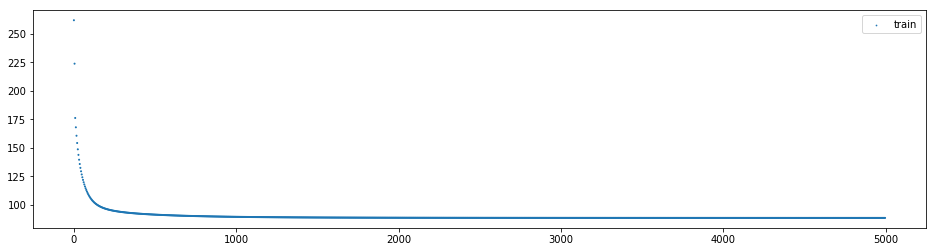

94.25612896015161


In [41]:
#Incresed features
beta, tr_set = L2_training(x, y, 1e-7, 5*1e-2, 5000)


x1 = [i for i, j in tr_set]
y1 = [j for i, j in tr_set]
plt.figure(figsize=((16,4)))
plt.scatter(x1, y1, s=s, label = 'train')

plt.legend()
plt.show()

#print(y)
#print(beta)

y_pred = prediction(x_test, beta)

test_error = rmse(y_pred, y_test)
print(test_error)

262.91813864923824
262.91813864923824
Iteration : 0  Error = 261.983914
Iteration : 1000  Error = 89.389916
Iteration : 2000  Error = 88.617214
Iteration : 3000  Error = 88.497000
Iteration : 4000  Error = 88.466654
Iterations completed. Error = 88.455313


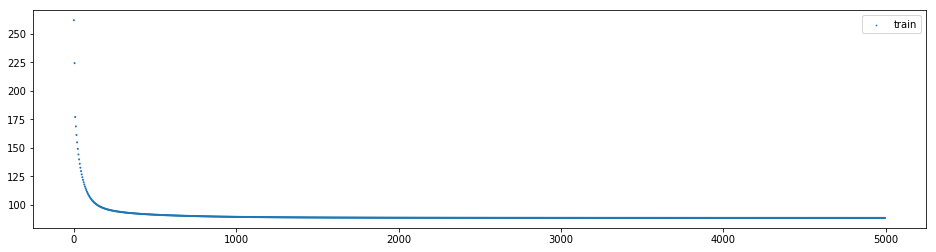

94.18199310071134


In [42]:
#Incresed features
beta, tr_set = L2_training(x, y, 1e-7, 8*1e-2, 5000)


x1 = [i for i, j in tr_set]
y1 = [j for i, j in tr_set]
plt.figure(figsize=((16,4)))
plt.scatter(x1, y1, s=s, label = 'train')

plt.legend()
plt.show()

#print(y)
#print(beta)

y_pred = prediction(x_test, beta)

test_error = rmse(y_pred, y_test)
print(test_error)

262.93547312494894
262.93547312494894
Iteration : 0  Error = 262.025779
Iteration : 1000  Error = 89.394865
Iteration : 2000  Error = 88.613318
Iteration : 3000  Error = 88.493024
Iteration : 4000  Error = 88.463332
Iterations completed. Error = 88.452608


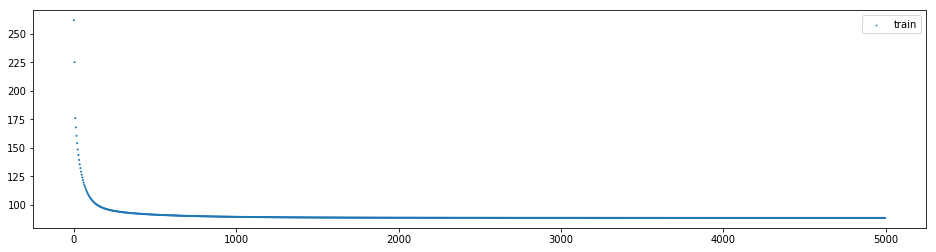

94.31607614178374


In [43]:
#Incresed features
beta, tr_set = L2_training(x, y, 1e-7, 3*1e-3, 5000)


x1 = [i for i, j in tr_set]
y1 = [j for i, j in tr_set]
plt.figure(figsize=((16,4)))
plt.scatter(x1, y1, s=s, label = 'train')

plt.legend()
plt.show()

#print(y)
#print(beta)

y_pred = prediction(x_test, beta)

test_error = rmse(y_pred, y_test)
print(test_error)

In [44]:
np.max(beta)

2.039611587267313

In [45]:
beta

array([[ 2.03961159],
       [ 0.47612729],
       [ 0.39899909],
       [ 0.42853814],
       [ 0.40467091],
       [ 0.57519324],
       [-0.23288238],
       [-0.10904109],
       [-0.69155364],
       [-1.16182694],
       [-1.55520239],
       [-2.16726619],
       [-2.57512552],
       [-1.66827552],
       [-0.30222229],
       [ 0.71677347],
       [ 1.21719954],
       [ 0.69406655],
       [ 0.42379433],
       [ 0.57291461],
       [ 0.74916059],
       [ 0.73015844],
       [ 0.66369223],
       [ 0.70945217],
       [ 0.93038265],
       [ 1.34590088],
       [ 1.27812536],
       [ 0.97735319],
       [ 0.67676821],
       [ 0.41707054],
       [ 0.17289578],
       [-0.2044054 ],
       [ 0.83735496],
       [ 0.77234737],
       [ 0.36588644],
       [ 0.03484218],
       [-0.08144273],
       [ 0.07906907],
       [ 0.25798949],
       [ 0.11304332],
       [ 0.24033726],
       [ 0.21583689],
       [ 0.09926539],
       [ 0.1558432 ],
       [ 0.26594113],
       [ 0

262.99579079361354
262.99579079361354
Iteration : 0  Error = 262.161746
Iteration : 1000  Error = 89.418689
Iteration : 2000  Error = 88.619173
Iteration : 3000  Error = 88.496372
Iteration : 4000  Error = 88.465827
Iterations completed. Error = 88.454596


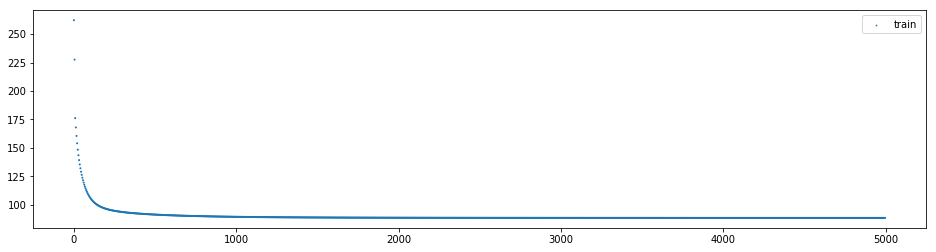

94.1096666877689


In [46]:
#Incresed features
beta, tr_set = L2_training(x, y, 1e-7, 1, 5000)


x1 = [i for i, j in tr_set]
y1 = [j for i, j in tr_set]
plt.figure(figsize=((16,4)))
plt.scatter(x1, y1, s=s, label = 'train')

plt.legend()
plt.show()

#print(y)
#print(beta)

y_pred = prediction(x_test, beta)

test_error = rmse(y_pred, y_test)
print(test_error)

In [45]:
def L1_gradient(x, y, gamma, beta):
    g = (np.exp(np.matmul(x, beta)) - y)*x
    res = np.sum(g, axis = 0)
    res = res + np.sum(0.5*gamma*np.sign(beta))
    
    return res


def L1_training(x, y, alpha, gamma, iterations):
    #gradient descent method 
    beta = np.random.normal(scale = 1.0/x.shape[1], size = (x.shape[1], 1))  #initialize
    
    m = np.matmul(x, beta)
    loss = np.sum(np.exp(m) - y*m) + np.sum(0.5*gamma*np.abs(beta))

    error = rmse(y, prediction(x, beta))
    
    itr = 0
    #print(error)
    #error = np.abs(np.asscalar(error))
    
    #print(error)
    
    training_process = []
    while(itr < iterations):
        beta = beta - alpha*L1_gradient(x, y, gamma, beta).reshape(beta.shape)
        
        #m = np.matmul(x, beta)
        #loss = np.sum((np.exp(m) - y*m))
        error = rmse(y, prediction(x, beta))
        training_process.append((itr, error))
        
        #if(itr == 0 or itr%1000 == 0):
            #print("Iteration : %d  Error = %f" %(itr, error))
        itr = itr+1
    
    error = rmse(y, prediction(x, beta))
    #print("Iterations completed. Error = %f" %(error))
    
    return beta, training_process

262.92469280983704
262.92469280983704
Iteration : 0  Error = 261.998377
Iteration : 1000  Error = 89.407373
Iteration : 2000  Error = 88.614805
Iteration : 3000  Error = 88.493370
Iteration : 4000  Error = 88.463474
Iterations completed. Error = 88.452689


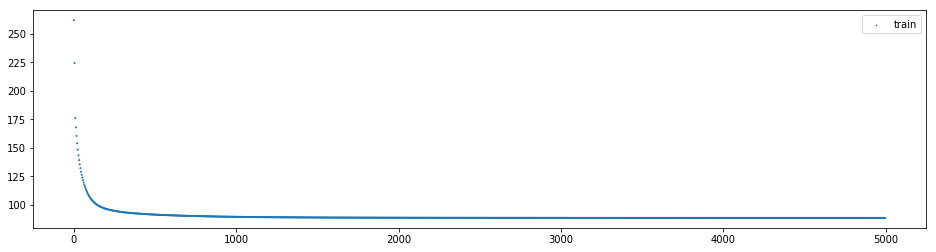

93.97862999981724


In [50]:
#Incresed features
beta, tr_set = L1_training(x, y, 1e-7, 1e-3, 5000)


x1 = [i for i, j in tr_set]
y1 = [j for i, j in tr_set]
plt.figure(figsize=((16,4)))
plt.scatter(x1, y1, s=s, label = 'train')

plt.legend()
plt.show()

#print(y)
#print(beta)

y_pred = prediction(x_test, beta)

test_error = rmse(y_pred, y_test)
print(test_error)

262.91845824101046
262.91845824101046
Iteration : 0  Error = 261.985837
Iteration : 1000  Error = 89.405374
Iteration : 2000  Error = 88.614812
Iteration : 3000  Error = 88.493606
Iteration : 4000  Error = 88.463714
Iterations completed. Error = 88.452905


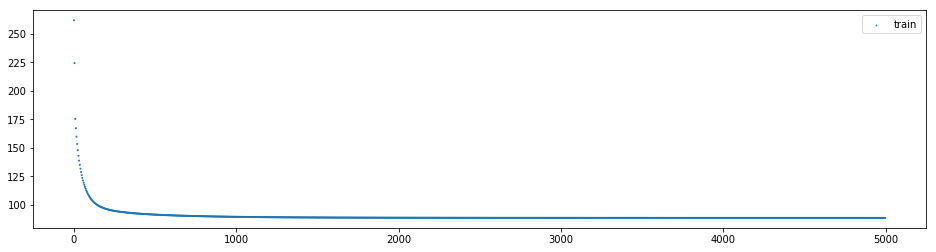

94.18355178335558


In [51]:
#Incresed features
beta, tr_set = L1_training(x, y, 1e-7, 1e-4, 5000)


x1 = [i for i, j in tr_set]
y1 = [j for i, j in tr_set]
plt.figure(figsize=((16,4)))
plt.scatter(x1, y1, s=s, label = 'train')

plt.legend()
plt.show()

#print(y)
#print(beta)

y_pred = prediction(x_test, beta)

test_error = rmse(y_pred, y_test)
print(test_error)

262.93619221065103
262.93619221065103
Iteration : 0  Error = 262.024995
Iteration : 1000  Error = 89.395104
Iteration : 2000  Error = 88.613391
Iteration : 3000  Error = 88.493101
Iteration : 4000  Error = 88.463384
Iterations completed. Error = 88.452640


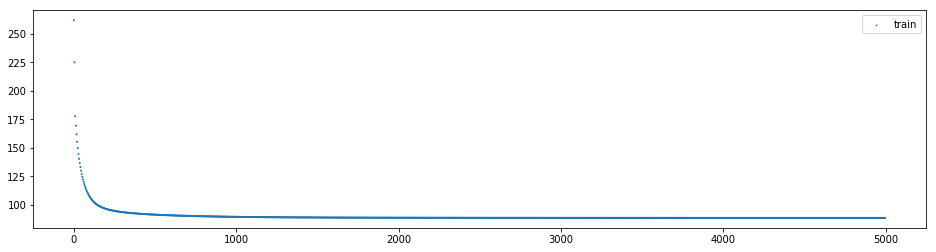

94.09994865306159


In [64]:
#Incresed features
beta, tr_set = L1_training(x, y, 1e-7, 1e-2, 5000)


x1 = [i for i, j in tr_set]
y1 = [j for i, j in tr_set]
plt.figure(figsize=((16,4)))
plt.scatter(x1, y1, s=s, label = 'train')

plt.legend()
plt.show()

#print(y)
#print(beta)

y_pred = prediction(x_test, beta)

test_error = rmse(y_pred, y_test)
print(test_error)

In [15]:
#Incresed features
beta, tr_set = L1_training(x, y, 1e-7, 1e-3, 5000)


x1 = [i for i, j in tr_set]
y1 = [j for i, j in tr_set]
plt.figure(figsize=((16,4)))
plt.scatter(x1, y1, s=s, label = 'train')

plt.legend()
plt.show()

#print(y)
#print(beta)

y_pred = prediction(x_test, beta)

test_error = rmse(y_pred, y_test)
print(test_error)

NameError: name 'L1_training' is not defined

In [46]:
#x[:] = x[:]
x2 = np.append(x, y, axis = 1)

np.random.shuffle(x2)             #Shuffling the dataset


y2 = x2[:, -1]
y2.shape = (x2.shape[0], 1)
x2 = x2[:, :-1]

l = x2.shape[0]
l = int(0.8*l)

x_train = x2[:l]
y_train = y2[:l]
x_valid = x2[l:]
y_valid = y2[l:]

ALPHA = np.linspace(1e-8, 1e-7, 6)
GAMMA = np.linspace(1e-3 ,1e-2, 6)

Validation = np.zeros((ALPHA.shape[0]*GAMMA.shape[0], 5))


iterations = 1000
i = 0
for alpha in ALPHA:
    for gamma in GAMMA:
        
        beta1, tr_set = sgd(x_train, y_train, alpha, iterations)
        e1 = rmse(y_valid, prediction(x_valid, beta1))
        beta2, tr_set = L1_training(x_train, y_train, alpha, gamma, iterations)
        e2 = rmse(y_valid, prediction(x_valid, beta2))
        beta3, tr_set = L2_training(x_train, y_train, alpha, gamma, iterations)
        e3 = rmse(y_valid, prediction(x_valid, beta3))

        Validation[i][0] = alpha
        Validation[i][1] = gamma
        Validation[i][2] = e1
        Validation[i][3] = e2
        Validation[i][4] = e3

        print("Validation : %d completed" %(i))
        i = i + 1

best = np.argmin(Validation, axis = 0)
print(best)

Validation : 0 completed
Validation : 1 completed
Validation : 2 completed
Validation : 3 completed
Validation : 4 completed
Validation : 5 completed
Validation : 6 completed
Validation : 7 completed
Validation : 8 completed
Validation : 9 completed
Validation : 10 completed
Validation : 11 completed
Validation : 12 completed
Validation : 13 completed
Validation : 14 completed
Validation : 15 completed
Validation : 16 completed
Validation : 17 completed
Validation : 18 completed
Validation : 19 completed
Validation : 20 completed
Validation : 21 completed
Validation : 22 completed
Validation : 23 completed
Validation : 24 completed
Validation : 25 completed
Validation : 26 completed
Validation : 27 completed
Validation : 28 completed
Validation : 29 completed
Validation : 30 completed
Validation : 31 completed
Validation : 32 completed
Validation : 33 completed
Validation : 34 completed
Validation : 35 completed
[ 0  0 31 35 33]


In [40]:
print(Validation[:6,2])
#print(Validation[32][3])
#print(Validation[34][4])

[108.99301491  92.0029473   89.2116652   88.01376293  87.29724748
  86.76589241]


In [48]:
print("Best possible error for sgd = ", Validation[best[2], 2], "Alpha = ", Validation[best[2], 0])
print("Best possible error for L1 = ", Validation[best[3], 3], "Alpha = ", Validation[best[3], 0], "Gamma = ", Validation[best[3], 1])
print("Best possible error for L2 = ",Validation[best[4], 4], "Alpha = ", Validation[best[4], 0], "Gamma = ", Validation[best[4],1])

('Best possible error for sgd = ', 92.48489631679547, 'Alpha = ', 1e-07)
('Best possible error for L1 = ', 92.47971110697455, 'Alpha = ', 1e-07, 'Gamma = ', 0.01)
('Best possible error for L2 = ', 92.5117865993319, 'Alpha = ', 1e-07, 'Gamma = ', 0.0064)


In [55]:
yyy = np.linspace(1e-3 ,1e-2, 6)
print(yyy)

[0.001  0.0028 0.0046 0.0064 0.0082 0.01  ]


In [52]:
yyyy = np.linspace(1e-7, 1e-6, 6)
print(yyyy)

[1.0e-07 2.8e-07 4.6e-07 6.4e-07 8.2e-07 1.0e-06]


In [52]:
yyyy = np.linspace(1e-8, 1e-7, 6)
yyyyy = np.linspace(1e-7, 1e-6, 6)

yyyy = np.array([1,2,4,6,8])*1e-7
#yyyy = np.append(yyyy, yyyyy)
print(yyyy)

[1.e-07 2.e-07 4.e-07 6.e-07 8.e-07]


In [16]:
print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)

(8708, 59)
(8708, 1)
(2178, 59)
(2178, 1)


In [72]:
print(x.shape)
np.random.shuffle(x)
print(x.shape)

l = x.shape[0]
l = int(0.8*l)

x_train = x[:l]
x_valid = x[l:]

print(x_train.shape)
print(x_valid.shape)

(10886, 59)
(10886, 59)
(8708, 59)
(2178, 59)


Iteration : 0  Error = 262.000133


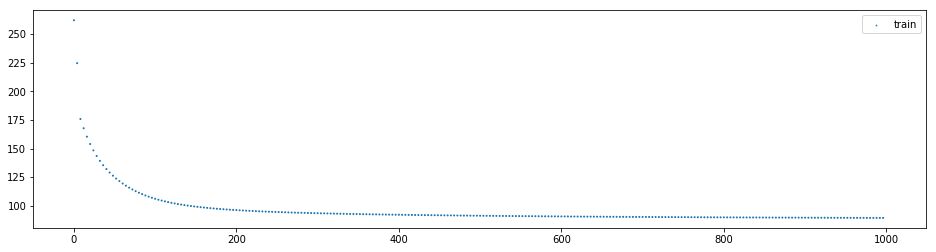

95.13539600501403


In [12]:
#Incresed features
beta, tr_set = sgd(x, y, 1e-7, 1000)


x1 = [i for i, j in tr_set]
y1 = [j for i, j in tr_set]
plt.figure(figsize=((16,4)))
plt.scatter(x1, y1, s=s, label = 'train')

plt.legend()
plt.show()

#print(y)
#print(beta)

y_pred = prediction(x_test, beta)

test_error = rmse(y_pred, y_test)
print(test_error)

(10886, 59)
(10886, 59)
Iteration : 0  Error = 262.033503
Iteration : 1000  Error = 180.902832
Iteration : 2000  Error = 180.766601
Iteration : 3000  Error = 180.759379
Iteration : 4000  Error = 180.758583


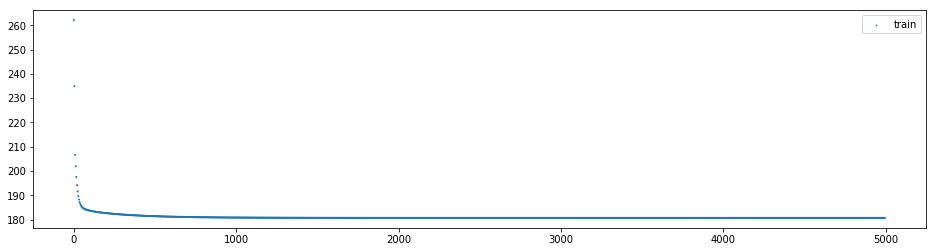

182.70924792407354


In [12]:
print(x.shape)
np.random.shuffle(x)
print(x.shape)

#Incresed features
beta, tr_set = sgd(x, y, 1e-7, 5000)


x1 = [i for i, j in tr_set]
y1 = [j for i, j in tr_set]
plt.figure(figsize=((16,4)))
plt.scatter(x1, y1, s=s, label = 'train')

plt.legend()
plt.show()

#print(y)
#print(beta)

y_pred = prediction(x_test, beta)

test_error = rmse(y_pred, y_test)
print(test_error)

('Shape x ', (10886, 59))
Iteration : 0  Error = 262.817207
Iteration : 1000  Error = 183.773065


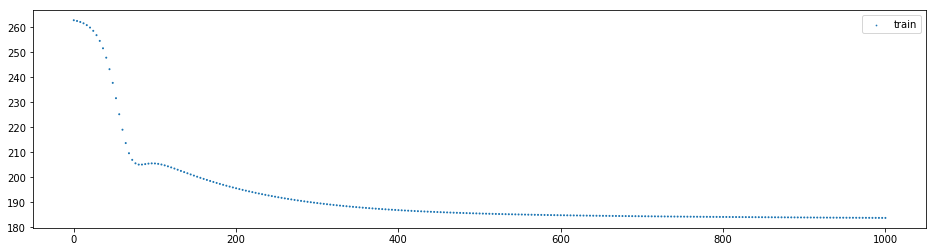

186.28400911735136


In [21]:
temp = np.random.permutation(x.shape[0])
x2 = x[temp, :]

#Incresed features
beta, tr_set = sgd(x2, y, 1e-7, 1001)

x1 = [i for i, j in tr_set]
y1 = [j for i, j in tr_set]
plt.figure(figsize=((16,4)))
plt.scatter(x1, y1, s=s, label = 'train')

plt.legend()
plt.show()

#print(y)
#print(beta)

y_pred = prediction(x_test, beta)

test_error = rmse(y_pred, y_test)
print(test_error)

('Shape x ', (10886, 59))
Iteration : 0  Error = 261.969959
Iteration : 1000  Error = 89.406677


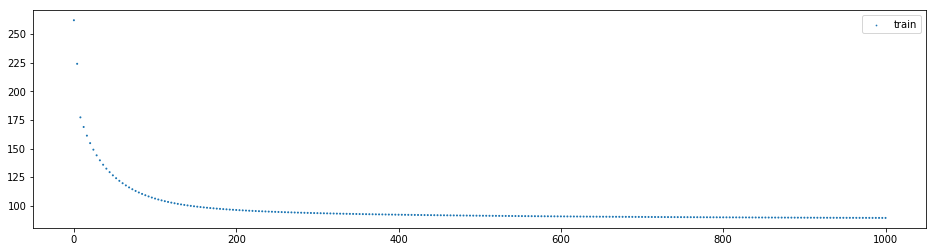

95.21121568182566


In [50]:
temp = np.random.permutation(x.shape[0])
x2 = x[temp, :]

#Incresed features
beta, tr_set = sgd(x, y, 1e-7, 1001)


x1 = [i for i, j in tr_set]
y1 = [j for i, j in tr_set]
plt.figure(figsize=((16,4)))
plt.scatter(x1, y1, s=s, label = 'train')

plt.legend()
plt.show()

#print(y)
#print(beta)

y_pred = prediction(x_test, beta)

test_error = rmse(y_pred, y_test)
print(test_error)

In [27]:
print(x2[0,:])

[1.     1.     0.     0.     0.42   0.4242 0.62   0.1343 0.     0.
 1.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     1.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     1.     0.     0.     0.     0.
 0.     1.     1.     0.     0.     0.     0.     0.     0.    ]


In [36]:
#x2[:] = x[:]
yy = y
print(x2.shape)
print(yy.shape)
x2 = np.append(x2, yy, axis = 1)
print(x2.shape)
x2 = x2[:, :-1]


(10886, 60)
(10886, 1)
(10886, 61)


In [41]:
#x[:] = x[:]
x2 = np.copy(x)
x2 = np.append(x2, y, axis = 1)

np.random.shuffle(x2)             #Shuffling the dataset

x2 = x2[:, :-1]
y2 = x2[:, -1]

print(x2.shape)
y2.shape

(10886, 59)


(10886,)

In [17]:
ac = prediction(x_valid, beta1)
print(ac)
y_valid

[[0.31778249]
 [0.25203467]
 [0.23328739]
 ...
 [0.48540288]
 [0.27892199]
 [0.34969015]]


array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [0.],
       [0.]])

In [18]:
np.sqrt(np.sum(np.square(ac-y_valid))/ac.shape[0])

0.3575897547420162

In [19]:
np.max(y_valid)

1.0

In [20]:
np.max(y)

977.0

In [22]:
np.max(y_train)

1.0

In [35]:
x2 = np.append(x, y, axis = 1)
x2.shape
np.max(x2[:,-1])

977.0

977.0

In [38]:
#x[:] = x[:]
x2 = np.append(x, y, axis = 1)
print(np.max(x2[:,-1]))

np.random.shuffle(x2)             #Shuffling the dataset

y2 = x2[:, -1]
y2.shape = (x2.shape[0], 1)

x2 = x2[:, :-1]




l = x2.shape[0]
l = int(0.8*l)

x_train = x2[:l]
y_train = y2[:l]
x_valid = x2[l:]
y_valid = y2[l:]

977.0
1.0
977.0


In [26]:
np.max(y_valid)

1.0

In [27]:
np.max(y2)

1.0